In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<b>Import Breast Cancer Dataset</b>

In [9]:
from sklearn.datasets import load_breast_cancer

<b>Extract Inputs & Target variables then split the Data into Training & Testing Data</b>

In [11]:
x, y = load_breast_cancer( return_X_y= True)

# Split the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=17)

<b> Import Decision Tree Classifier</b>

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model Accuracy :',round(accuracy_score(y_test, pred),3))


train_pred=clf.predict(X_train)
print(accuracy_score(y_train,y_train))

Model Accuracy : 0.958
1.0


<b>Visualize the Trained Decision Tree Model</b>

[Text(1139.25, 1261.9285714285713, 'X[27] <= 0.136\ngini = 0.474\nsamples = 426\nvalue = [164, 262]'),
 Text(542.5, 1067.7857142857142, 'X[20] <= 16.805\ngini = 0.143\nsamples = 271\nvalue = [21, 250]'),
 Text(325.5, 873.6428571428571, 'X[10] <= 1.048\ngini = 0.024\nsamples = 245\nvalue = [3, 242]'),
 Text(217.0, 679.5, 'X[23] <= 782.7\ngini = 0.016\nsamples = 244\nvalue = [2, 242]'),
 Text(108.5, 485.3571428571429, 'gini = 0.0\nsamples = 226\nvalue = [0, 226]'),
 Text(325.5, 485.3571428571429, 'X[16] <= 0.053\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(217.0, 291.2142857142858, 'X[22] <= 102.7\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(108.5, 97.07142857142867, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(325.5, 97.07142857142867, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(434.0, 291.2142857142858, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(434.0, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(759.5, 873.6428571428571, 'X[1] <= 16.37

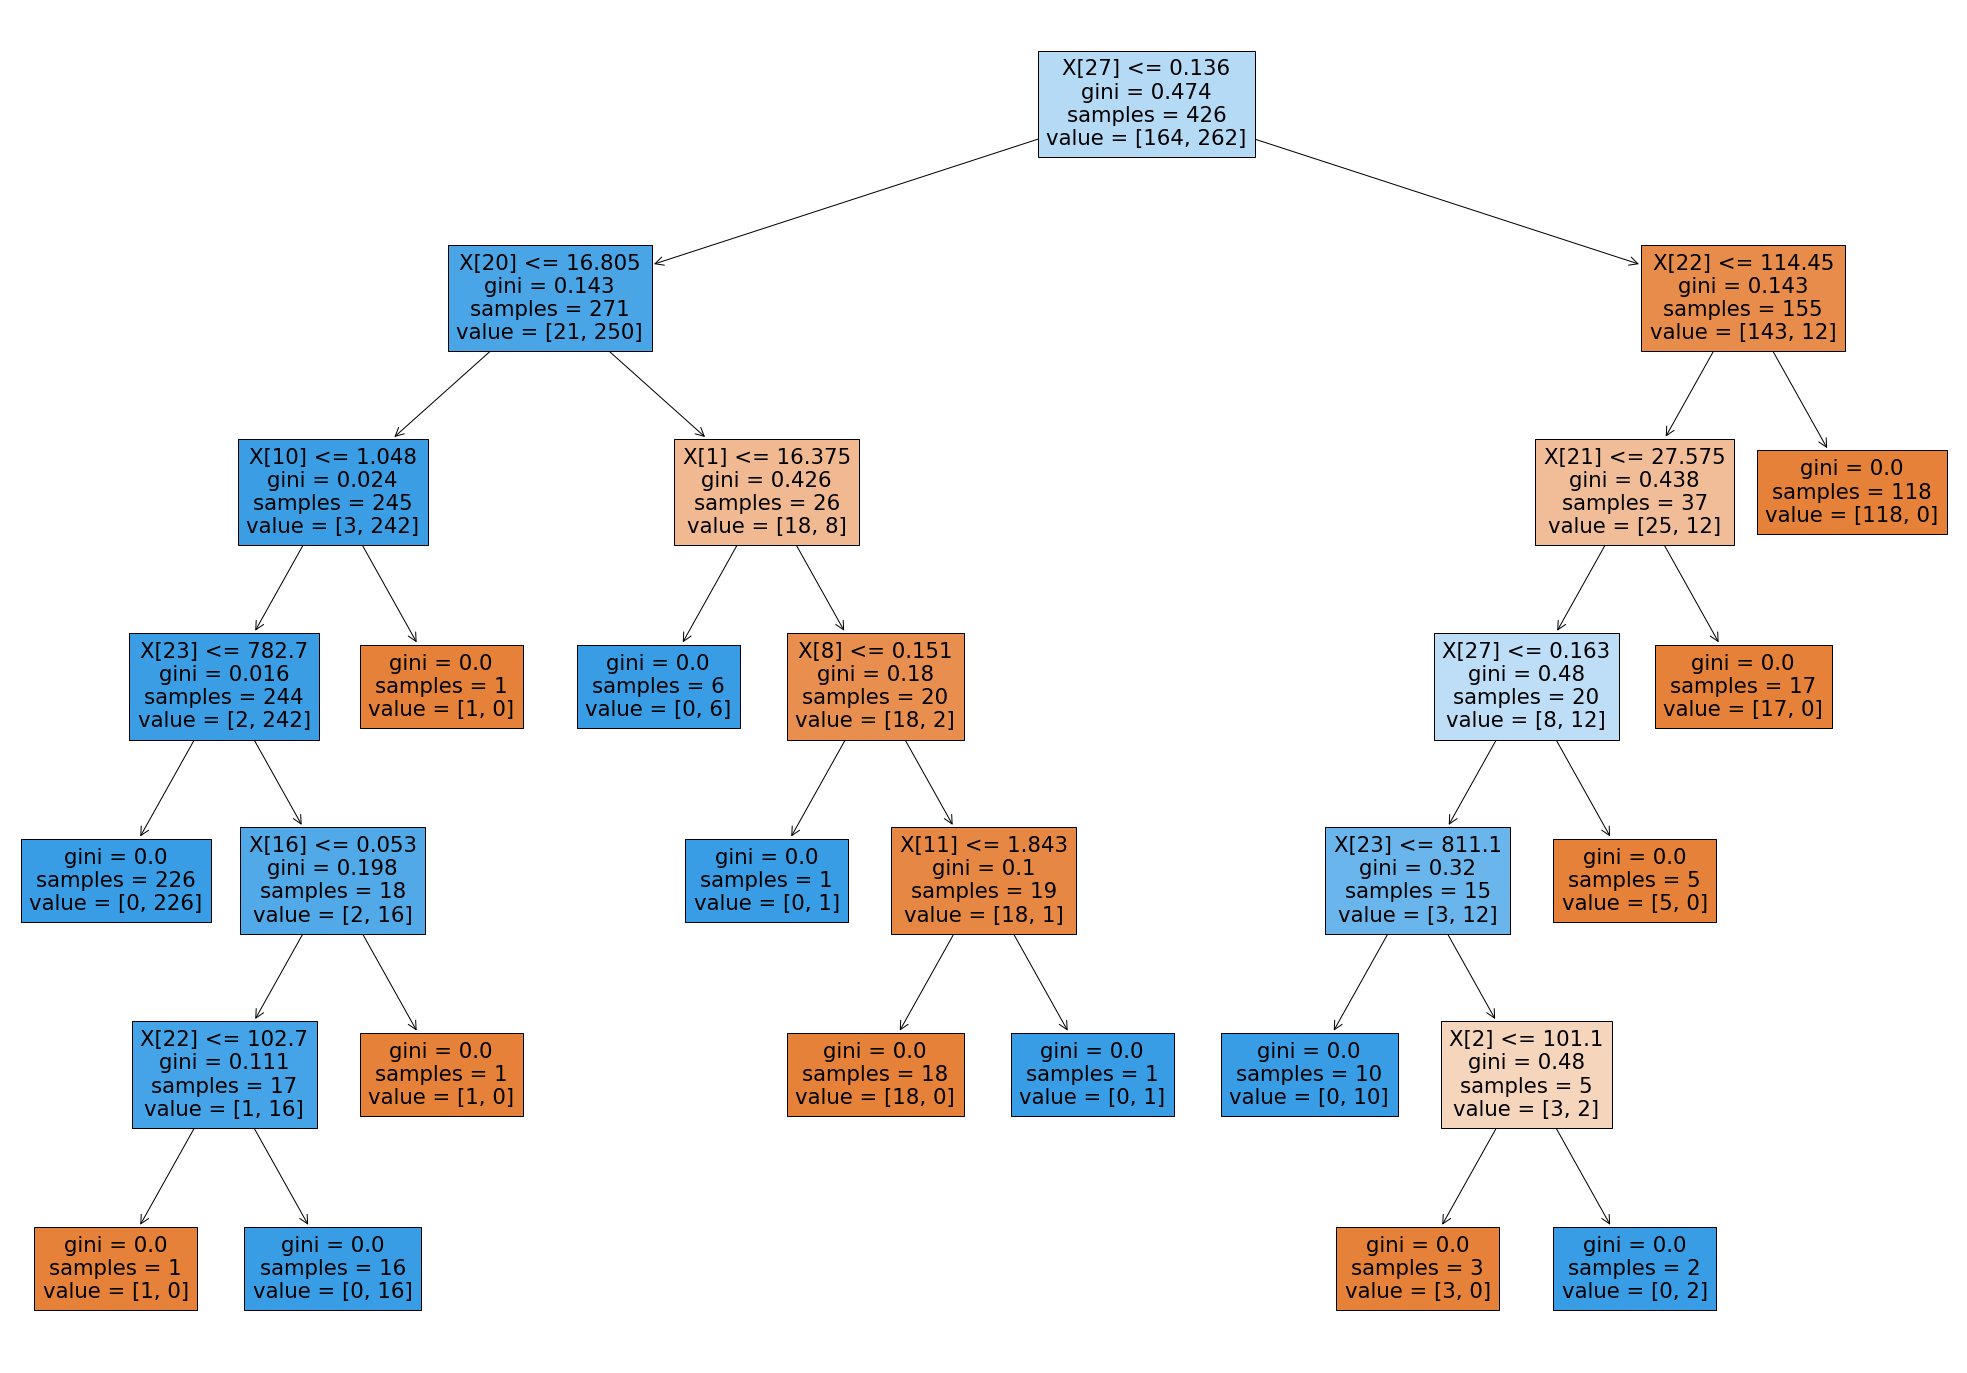

In [16]:
from sklearn import tree
plt.figure(figsize=(35,25))
tree.plot_tree(clf,filled=True)

<b>Minimal cost-complexity pruning</b>

In [17]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas

array([0.        , 0.00310424, 0.00422535, 0.00459934, 0.0056338 ,
       0.01126761, 0.01472058, 0.01755146, 0.0510374 , 0.33061121])

<b>For each value of ccp_alpha, train a DecisionTree model and store it in models.</b>

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3306112126590868


## Accuracy vs alpha for training and testing sets

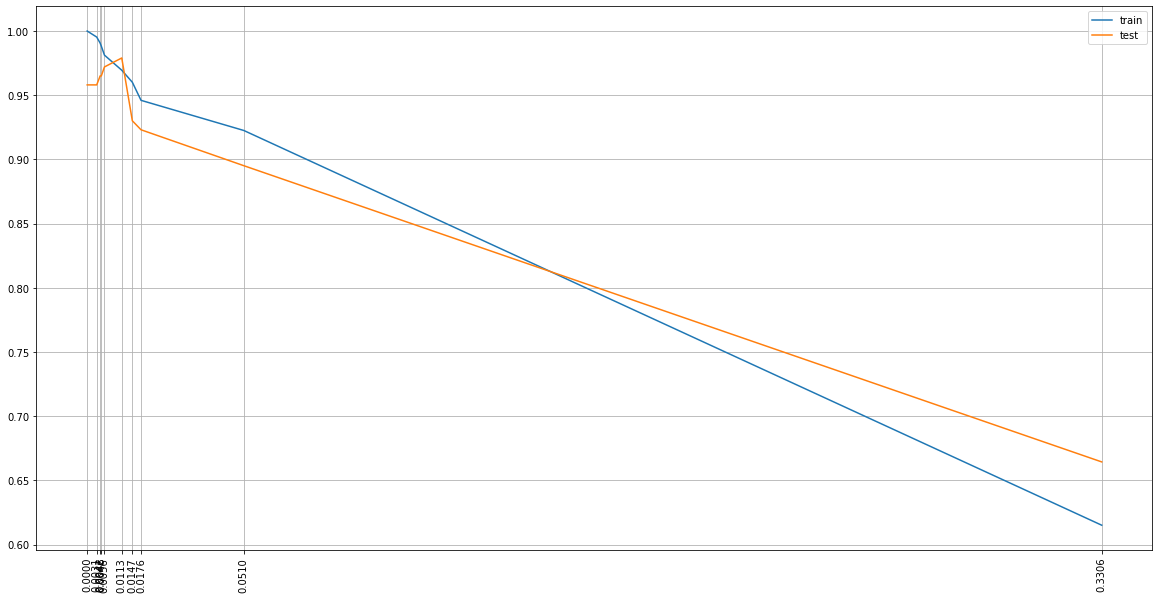

In [19]:
# For all the models trained for different values of ccp_alpha, find training and testing accuracy and plot it.
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# fig, ax = plt.subplots()
# ax.set_xlabel("alpha")
# ax.set_ylabel("accuracy")
# ax.set_title("Accuracy vs alpha for training and testing sets")
# ax.plot(ccp_alphas, train_scores, marker='o', label="train")
# ax.plot(ccp_alphas, test_scores, marker='o', label="test",
#         )
# ax.legend()
# plt.show()


plt.figure(figsize=(20,10))       #for setting size of graph
plt.plot(ccp_alphas,train_scores,label="train")
plt.plot(ccp_alphas,test_scores,label="test")
plt.xticks(ccp_alphas,rotation=90)
plt.grid()
plt.legend()
plt.show()